In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score, roc_auc_score 

<h1 style="color:#cd6ae8"> 
Import and scale new data for EDA
</h1>

In [2]:
# read the data and show 
data_old = pd.read_csv('./bs140513_032310.csv', sep=',',)
data_old.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [3]:
# Drop fraud column assgin to X varaible
# Assgin fraud column to y variable
# Preparing for reduce volumn of data
X = data_old.drop(columns=['fraud'], axis=1)
y = data_old['fraud']

In [4]:
# split train test and stratify with y variable to get sample data for EDA
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [5]:
# concat 2 of these for EDA
data = X_test
data['fraud'] = y_test
data.head()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
487846,151,'C636259913','1','M','28007','M1823072687','28007','es_transportation',29.67,0
450605,141,'C2030210340','2','M','28007','M348934600','28007','es_transportation',47.45,0
452667,141,'C359698649','3','F','28007','M85975013','28007','es_food',65.20,0
178015,61,'C868933598','1','M','28007','M348934600','28007','es_transportation',16.41,0
347168,112,'C1308910127','5','M','28007','M1823072687','28007','es_transportation',37.58,0


In [6]:
# Drop unused columns
dataIsolation = data
dataKNN = data
dataKBatch = data
dataDB = data
dataEllipt = data
data = data.drop(['fraud','customer','zipcodeOri','zipMerchant'],axis=1)
data.head()

,step,age,gender,merchant,category,amount
487846,151,'1','M','M1823072687','es_transportation',29.67
450605,141,'2','M','M348934600','es_transportation',47.45
452667,141,'3','F','M85975013','es_food',65.20
178015,61,'1','M','M348934600','es_transportation',16.41
347168,112,'5','M','M1823072687','es_transportation',37.58


<h1 style="color:#51c791"> 
EDA Process
</h1>

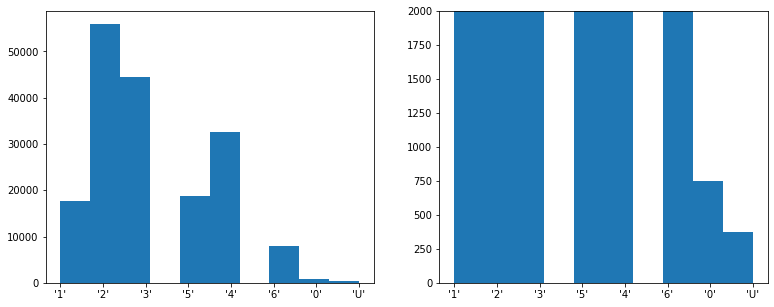

In [7]:
# Age chart
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(data['age'])

plt.subplot(132)
plt.ylim(top=2000)
plt.hist(data['age'])

plt.show()

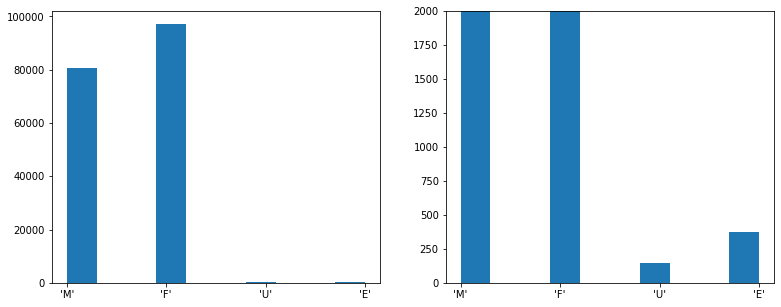

In [8]:
# Gender chart
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(data['gender'])

plt.subplot(132)
plt.ylim(top=2000)
plt.hist(data['gender'])

plt.show()

(array([14063., 15518., 16558., 17286., 18061., 18781., 19156., 19106.,
        19852., 20012.]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <a list of 10 Patch objects>)

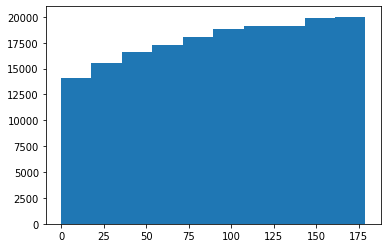

In [9]:
# Step chart
plt.hist(data['step'])

(array([1.61343e+05, 3.13700e+03, 3.65600e+03, 3.62600e+03, 3.40100e+03,
        1.11400e+03, 9.18000e+02, 8.75000e+02, 2.66000e+02, 5.70000e+01]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

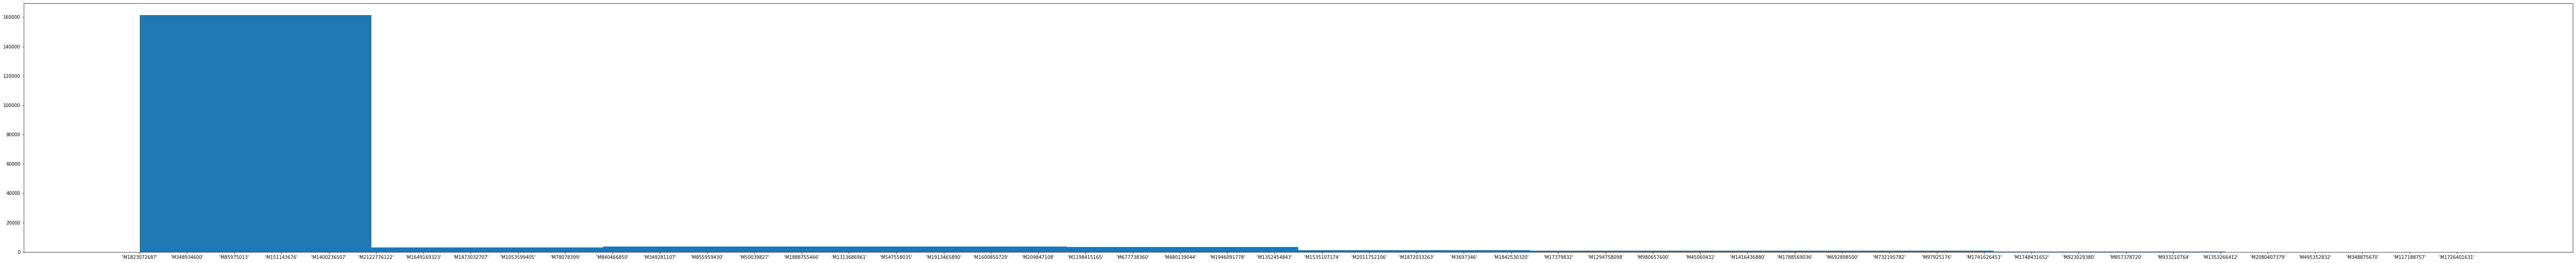

In [10]:
# Merchant chart
plt.figure(figsize=(100,10))
plt.hist(data['merchant'])

In [11]:
data['merchant'].value_counts()

'M1823072687'    89844
'M348934600'     61430
'M85975013'       7893
'M1053599405'     2080
'M151143676'      1936
'M855959430'      1857
'M1946091778'     1618
'M1913465890'     1246
'M209847108'      1144
'M480139044'      1083
'M349281107'       854
'M1600850729'      795
'M1535107174'      572
'M980657600'       537
'M78078399'        516
'M1198415165'      467
'M840466850'       414
'M1649169323'      358
'M50039827'        286
'M547558035'       282
'M692898500'       275
'M1888755466'      245
'M1400236507'      240
'M1842530320'      225
'M97925176'        187
'M732195782'       187
'M45060432'        165
'M1872033263'      164
'M1741626453'      162
'M1313686961'      159
'M677738360'       120
'M1352454843'      113
'M2122776122'       98
'M923029380'        98
'M17379832'         92
'M1873032707'       85
'M3697346'          84
'M1748431652'       79
'M2011752106'       69
'M1788569036'       64
'M1416436880'       62
'M1294758098'       62
'M857378720'        37
'M135326641

<h1 style="color:#ff8080"> 
Encode the data with LabelEncoder
</h1>

In [12]:
category = ['age','gender','merchant','category']
for column in category:
        if column in data.columns.values:
            data[column] = LabelEncoder().fit_transform(data[column])
        if column in dataIsolation.columns.values:
            dataIsolation[column] = LabelEncoder().fit_transform(dataIsolation[column])
        if column in dataKNN.columns.values:
            dataKNN[column] = LabelEncoder().fit_transform(dataKNN[column])
        if column in dataKBatch.columns.values:
            dataKBatch[column] = LabelEncoder().fit_transform(dataKBatch[column])
        if column in dataEllipt.columns.values:
            dataEllipt[column] = LabelEncoder().fit_transform(dataEllipt[column])
        if column in dataDB.columns.values:
            dataDB[column] = LabelEncoder().fit_transform(dataDB[column])
data.head()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,step,age,gender,merchant,category,amount
487846,151,1,2,18,12,29.67
450605,141,2,2,30,12,47.45
452667,141,3,1,45,3,65.20
178015,61,1,2,30,12,16.41
347168,112,5,2,18,12,37.58


In [13]:
# check missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178393 entries, 487846 to 313146
Data columns (total 6 columns):
step        178393 non-null int64
age         178393 non-null int32
gender      178393 non-null int32
merchant    178393 non-null int32
category    178393 non-null int32
amount      178393 non-null float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.8 MB


In [14]:
#check unique value in age
data.age.unique()

array([1, 2, 3, 5, 4, 6, 0, 7], dtype=int64)

In [15]:
#check unique value in gendar
data.gender.unique()

array([2, 1, 3, 0], dtype=int64)

In [16]:
#check unique value in category
data.category.unique()

array([12,  3,  0,  5, 10,  6,  4, 14, 11,  2,  7,  9,  1,  8, 13],
      dtype=int64)

In [17]:
#check unique value in merchant
data.merchant.unique()

array([18, 30, 45,  9,  7, 28, 12, 21,  0, 41, 42, 31, 43, 36, 22,  4, 37,
       23, 11, 27,  2, 38, 34, 24,  5, 10, 25, 20, 32, 19, 14,  3, 49, 33,
        8, 17, 39, 40, 48, 15, 16, 46, 44, 47,  6, 26, 35, 29,  1, 13],
      dtype=int64)

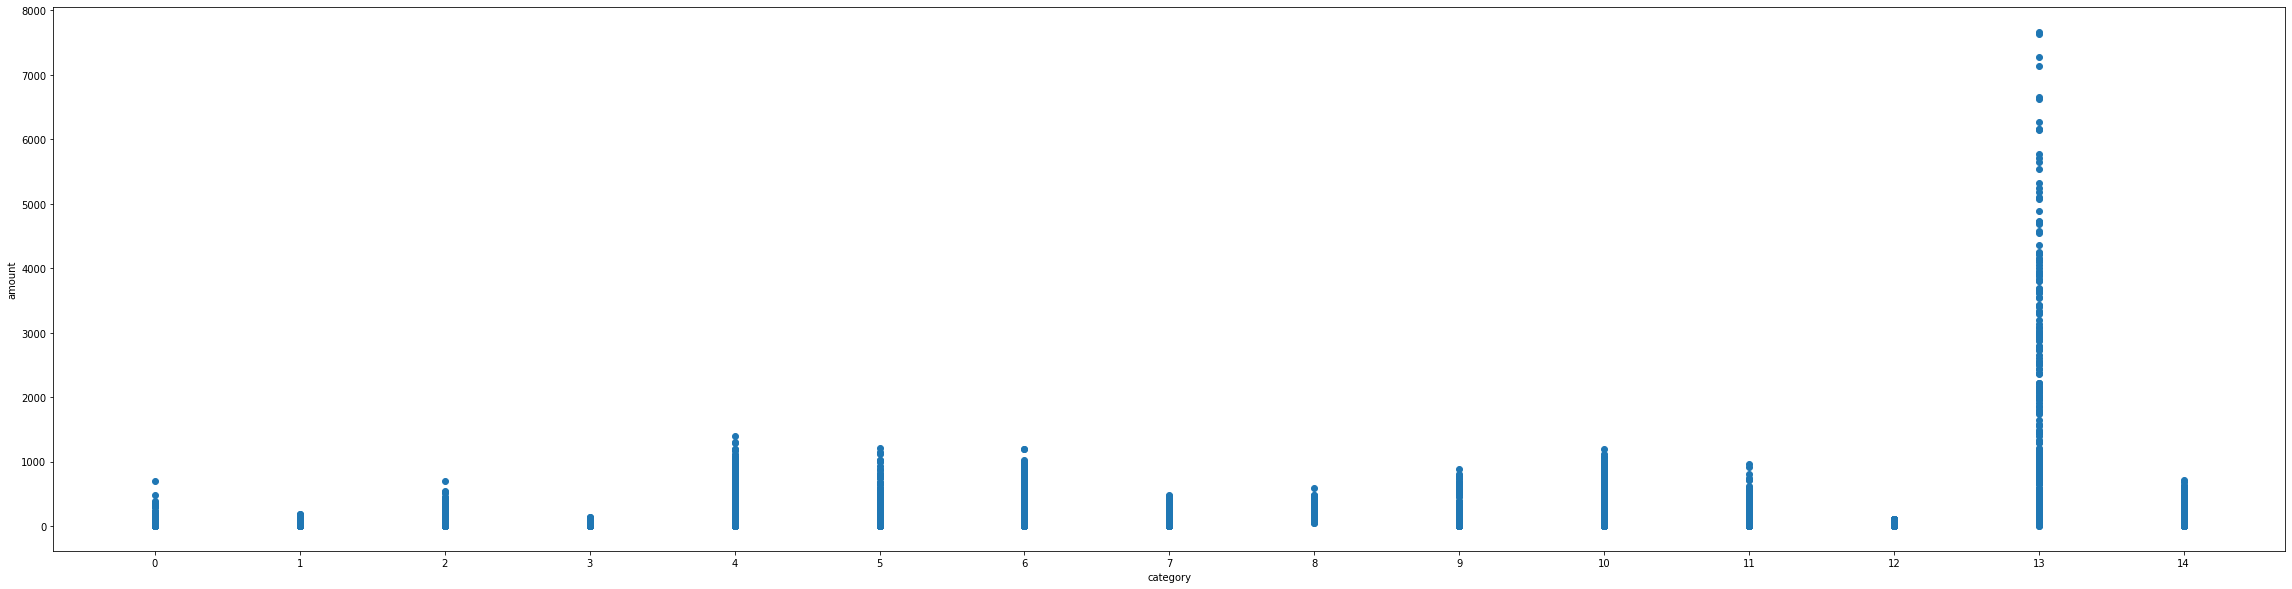

In [18]:
#plot category with amount
plt.figure(figsize=(40,10))
plt.ylabel('amount')
plt.xlabel('category')
plt.scatter(data['category'],data['amount'])
plt.xticks(range(15))
plt.show()

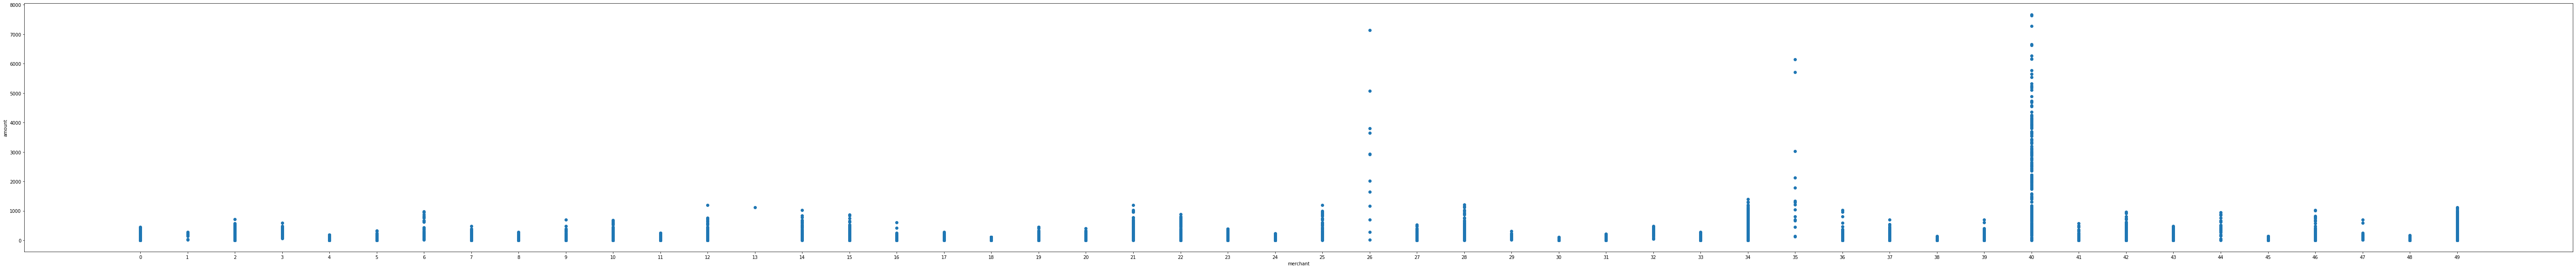

In [19]:
#plot merchant with amount
plt.figure(figsize=(100,10))
plt.ylabel('amount')
plt.xlabel('merchant')
plt.scatter(data['merchant'],data['amount'])
plt.xticks(range(50))
plt.show()

<h1 style="color:#ff8080"> 
PCA
</h1>

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents)

In [21]:
principalDf.head()

,0,1,2,3,4
0,-8.284720,-56.353613,4.363596,0.576945,-2.009076
1,9.584228,-46.084791,-7.222257,1.659187,-1.020577
2,27.432272,-45.738623,-22.872496,-5.920935,-0.011034
3,-21.225669,33.978490,-5.223232,1.327416,-2.018957
4,-0.263150,-17.391944,5.454128,0.476846,1.992338


<h1 style="color:#ff8080"> 
First model, Isolation Forest
</h1>

In [22]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=800, max_samples=600,contamination=0.01588,behaviour='new')
clf.fit(principalDf)
predict = clf.predict(principalDf)
scores_pred = clf.decision_function(principalDf)

In [23]:
dataIsolation['scores']= scores_pred
dataIsolation['anomaly']= predict
dataIsolation.head()
dataIsolation.loc[dataIsolation['anomaly'] == 1,'anomaly'] = 0
dataIsolation.loc[dataIsolation['anomaly'] == -1,'anomaly'] = 1
# data.value_counts()
dataIsolation['anomaly'].value_counts()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

0    175560
1      2833
Name: anomaly, dtype: int64

In [24]:
dataIsolation.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,scores,anomaly
487846,151,'C636259913',1,2,'28007',18,'28007',12,29.67,0,0.189492,0
450605,141,'C2030210340',2,2,'28007',30,'28007',12,47.45,0,0.197749,0
452667,141,'C359698649',3,1,'28007',45,'28007',3,65.20,0,0.090643,0
178015,61,'C868933598',1,2,'28007',30,'28007',12,16.41,0,0.181496,0
347168,112,'C1308910127',5,2,'28007',18,'28007',12,37.58,0,0.198842,0


In [25]:
# True positive
from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, dataIsolation['anomaly'])
matrix = confusion_matrix(dataIsolation['fraud'], dataIsolation['anomaly'])
print(matrix)

[[174614   1619]
 [   946   1214]]


In [26]:
# Calculate score
from sklearn.metrics import classification_report
# report = classification_report(y_test, dataIsolation['anomaly'])
report = classification_report(dataIsolation['fraud'], dataIsolation['anomaly'])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    176233
           1       0.43      0.56      0.49      2160

   micro avg       0.99      0.99      0.99    178393
   macro avg       0.71      0.78      0.74    178393
weighted avg       0.99      0.99      0.99    178393



<h1 style="color:#ff8080"> 
Second model, pyod model knn
</h1>

In [27]:
from pyod.models.knn import KNN

Install<br>
<h2> pip install pyod </h2><br>
first

In [28]:
# Not working model
# clf_knn = KNN(algorithm='auto', contamination=0.01, leaf_size = 100, method='median', metric='minkowski', n_jobs=10, n_neighbors = 5, p=2, radius=1.0)
clf_knn = KNN(algorithm='auto', contamination=0.01, leaf_size = 300, method='median', metric='minkowski', n_jobs=30, n_neighbors = 5, p=2, radius=1.0)
clf_knn.fit(principalDf)

KNN(algorithm='auto', contamination=0.01, leaf_size=300, method='median',
  metric='minkowski', metric_params=None, n_jobs=30, n_neighbors=5, p=2,
  radius=1.0)

In [29]:
y_pred = clf_knn.labels_ 

In [30]:
dataKNN['predicted']= y_pred

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
dataKNN.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,scores,anomaly,predicted
487846,151,'C636259913',1,2,'28007',18,'28007',12,29.67,0,0.189492,0,0
450605,141,'C2030210340',2,2,'28007',30,'28007',12,47.45,0,0.197749,0,0
452667,141,'C359698649',3,1,'28007',45,'28007',3,65.20,0,0.090643,0,0
178015,61,'C868933598',1,2,'28007',30,'28007',12,16.41,0,0.181496,0,0
347168,112,'C1308910127',5,2,'28007',18,'28007',12,37.58,0,0.198842,0,0


In [32]:
# True positive
from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, dataIsolation['anomaly'])
matrix_knn = confusion_matrix(dataKNN['fraud'], dataKNN['predicted'])
print(matrix_knn)

[[175778    455]
 [   831   1329]]


พยายามนานมาก ปรับทุกค่าแต่ก็ไม่เป็นผล class 1 pick ได้ไม่ค่อยดี (เรียกว่าไม่ดีเลยดีกว่า)

In [33]:
# Calculate score
from sklearn.metrics import classification_report
# report = classification_report(y_test, dataIsolation['anomaly'])
report_knn = classification_report(dataKNN['fraud'], dataKNN['predicted'])
print(report_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176233
           1       0.74      0.62      0.67      2160

   micro avg       0.99      0.99      0.99    178393
   macro avg       0.87      0.81      0.84    178393
weighted avg       0.99      0.99      0.99    178393



<h1 style="color:#ff8080"> 
Third model, Minibatch means
</h1>

In [34]:
from sklearn.cluster import MiniBatchKMeans, DBSCAN

In [35]:
def print_model_result(y_true, y_predicted):
    
    print(f"R2: {r2_score(y_true, y_predicted):0.3f}")
    print(f"Roc_Auc: {roc_auc_score(y_true, y_predicted):0.3f}\n")
    
    print('Classifcation report:\n', classification_report(y_true, y_predicted))

In [36]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(principalDf)

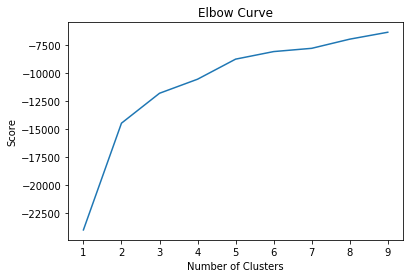

In [37]:
clustno = range(1, 10)

kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [38]:
# Not working model
kmeans = MiniBatchKMeans(n_clusters=10, init='k-means++',  max_iter=300,random_state=42).fit(X_scaled)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_scaled)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(np.array(X_scaled), X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

print_model_result(np.array(dataKBatch['fraud']), km_y_pred)

R2: -3.595
Roc_Auc: 0.624

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    176233
           1       0.07      0.29      0.11      2160

   micro avg       0.95      0.95      0.95    178393
   macro avg       0.53      0.62      0.54    178393
weighted avg       0.98      0.95      0.96    178393



<h1 style="color:#ff8080"> 
Fifth model, DBSCAN
</h1>

In [43]:
# Not working model
clustering = DBSCAN(eps=2, min_samples=10, n_jobs=3).fit(principalDf)
clustering.labels_

array([ 0,  1, -1, ..., -1,  0,  0], dtype=int64)

In [48]:
np.unique(clustering.labels_)
y_pred = clustering.labels_
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [44]:
# y_pred = clustering.labels_
# for i in range(len(y_pred)):
#     if y_pred[i] != -1:
#         y_pred[i] = 1
#         continue
#     if y_pred[i] == -1:
#         y_pred[i] = 0
# np.unique(y_pred)

array([0, 1], dtype=int64)

In [49]:
test = pd.DataFrame(dataKNN['fraud'])
test['predicted'] = y_pred
test.head()

,fraud,predicted
487846,0,1
450605,0,1
452667,0,0
178015,0,1
347168,0,1


In [50]:
# True positive
# matrix = confusion_matrix(y_test, dataIsolation['anomaly'])
matrix_knn = confusion_matrix(test['fraud'], test['predicted'])
print(matrix_knn)

[[ 27448 148785]
 [  2160      0]]


In [51]:
# Calculate score
from sklearn.metrics import classification_report
# report = classification_report(y_test, dataIsolation['anomaly'])
report_db = classification_report(test['fraud'], test['predicted'])
print(report_db)

              precision    recall  f1-score   support

           0       0.93      0.16      0.27    176233
           1       0.00      0.00      0.00      2160

   micro avg       0.15      0.15      0.15    178393
   macro avg       0.46      0.08      0.13    178393
weighted avg       0.92      0.15      0.26    178393




<h1 style="color:#ff8080"> 
Sixth model, EllipticEnvelope
</h1>

In [52]:
from sklearn.covariance import EllipticEnvelope

In [53]:
cov = EllipticEnvelope(assume_centered=True, support_fraction=0.1, contamination=0.012, random_state=0).fit(principalDf)

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.416759100012113 > -3.699935681235357). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.691473589255033 > -42.241666108594742). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.234544767367815 > -43.912914749447339). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.538397211244131 > -5.062641632196630). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.497317216174730 > -3.544295085586957). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.353160190446220 > -4.144806145003561). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.840396160441626 > -4.629612961766122). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.518811283980062 > -45.610581597300431). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.511420367711727 > -42.471440175352981). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.367299742864381 > -4.314378313550790). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.566045583973874 > -44.505618591407654). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.865085514155203 > -41.868579560864376). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.751870455959635 > -3.633659323718438). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.411278882144673 > -4.399953539249656). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.141635423712989 > -4.533808706089165). You may want to try with a higher value of support_fraction (current value: 0.1

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.087898479968199 > -3.653114883757000). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.882409833107694 > -3.508919757461423). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.570097559361210 > -3.594524627952728). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.457467065740054 > -8.929759629714860). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.805779911661636 > -3.239442311867654). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.287199200205016 > -3.342628867846229). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.096759167065093 > -4.128134478357981). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.318830229040975 > -4.124030810150376). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.711694307334270 > -44.386709396448346). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.952427724327503 > -4.181585461683631). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-0.468686410899997 > -3.785468461319850). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.664513656502800 > -3.891508050949641). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.865596511079563 > -42.177297953454151). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.804064908436825 > -2.944208893734792). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.929476861623137 > -3.895267052989740). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.390184762138455 > -42.331577127821255). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.772263450770934 > -3.613686054823201). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.496297479573441 > -3.773844341154752). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.997234431517034 > -45.268264714943804). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.345565285875111 > -41.784638396790925). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.223735091470903 > -3.914182048437463). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.639049491181728 > -3.340492338197884). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.268974900229754 > -4.269135200452277). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.389056318659700 > -46.350195783362338). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.749355138881056 > -4.434369387245066). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.523087790834310 > -4.084502264272011). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.323236367062327 > -3.354929727805621). You may want to try with a higher value of support_fraction (current value: 0.

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.144286809674053 > -4.009109956380826). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.613411878429009 > -3.856075016938915). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.708521498328730 > -4.863805824863851). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.303057275937308 > -2.379225081950262). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.393640040256223 > -44.244891903839694). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.999140714551517 > -3.244885742207662). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.709233167047046 > -4.262196110067690). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.243463944612653 > -4.049195768965713). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.145643969102505 > -4.751909488508645). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.524509522946076 > -3.752964912168562). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.219887232300012 > -43.123515549439546). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.991495317039155 > -3.124825720533771). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.701356106151653 > -43.181116055098506). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.479662076820814 > -3.487304214309350). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.299012678005395 > -3.257095073128577). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.348820712531669 > -3.593893150341114). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.796863156969629 > -4.344158019760412). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.473983135608513 > -4.558665773461824). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.660334059139879 > -42.913533047183478). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.725375899697092 > -4.133640752495527). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.668477249853696 > -3.599008096984205). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.686523980267738 > -4.512697204058753). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.980049408726096 > -4.673691408610797). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.699344122047048 > -4.482900814805134). You may want to try with a higher value of support_fraction (current value: 0.

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (2.781826668711833 > -3.918582614624492). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.240331908495664 > 0.674371918357808). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.915223016000398 > -3.160743470071658). You may want to try with a higher value of support_fraction (current value: 0.1

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.332556922124811 > -3.831074168964832). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.945445330415332 > -3.487048343527190). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.353260670471064 > 1.159176724834651). You may want to try with a higher value of support_fraction (current value: 0.1

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-0.279448339067821 > -4.770685924338038). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.273134529941037 > -43.677560145220184). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.012129689462936 > 0.989537501496441). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (2.621544730920380 > -3.981301456633110). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (0.440570454414665 > -3.535801518752479). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.596242429513243 > -3.600163048678350). You may want to try with a higher value of support_fraction (current value: 0.1

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.097026113371300 > -3.620918486707053). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.198806194248860 > -49.010278834428249). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.734187246689817 > -4.953746018027914). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.828127026423690 > -3.743462137303012). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.228223117088231 > -4.272735138391595). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.059380037962454 > -2.899446034121000). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.571718754075368 > -16.043547965506495). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.687111787189053 > -3.963369453743873). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.345636319508154 > -41.266742906537679). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.007949005353669 > -4.293809323465359). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.019156494874586 > -44.532311956377313). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.583522942215190 > -2.849124810197723). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.225140929504523 > -3.403994798652673). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-44.382777357370273 > -44.480346584700364). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.340923855250635 > -3.221606507644555). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.381806510851485 > -3.911008088195965). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.240268826532983 > -43.033665860963566). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.174784788986742 > -44.031680558354878). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.601807729570998 > -3.993853420981404). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.609433026118786 > -3.609575187742293). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.299210131511924 > -15.799087913266224). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.081049665928147 > -3.870138026238489). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.586144267092745 > -3.502404065696452). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.755041835819480 > -3.830229881240625). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.237352257357685 > -4.074693086833492). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.653671596349731 > -43.251738970577236). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.581178268030744 > -41.045143415842816). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.902340304517786 > -42.469150823445581). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.246286970433376 > -4.161170926954944). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.320110891867522 > -4.368888043228067). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.864742086339170 > -43.806245253913389). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.812462177615828 > -44.102171110292289). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.625923669679571 > -4.614443383554302). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.138389913582234 > -15.662236651074682). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-41.462462604729282 > -42.285731912261717). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.452571086286088 > -3.460770571924556). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.934065916819581 > -3.668673943035999). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.962375324492044 > -3.589780534017163). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.922497681227696 > -42.040887523347287). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.872810596316530 > -42.510552014817662). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.026471142018045 > -4.385259194750018). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.898009368175565 > -4.452712772999007). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-34.726881174394492 > -35.439519260231030). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-41.844688031799883 > -42.210294987646321). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.386037716807609 > -3.857045795194369). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.670980669541860 > -42.842053875970166). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.537792900399031 > -4.151496132906446). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.089895033888247 > -3.303216350551367). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.487856925273933 > -4.202379198909400). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.413882858372201 > -3.895676239423466). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.579642391573143 > -44.608235063686386). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.892729535156185 > -4.238463416460035). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.253308532044455 > -3.937305563146245). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.008836959232266 > -3.168155280491158). You may want to try with a higher value of support_fraction (current value: 0.

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.824401443348641 > -4.207199161009336). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (4.491453719801384 > -15.663958324824232). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.897401495208777 > -3.735956390789709). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.460130606396980 > -3.521619332730242). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.500419210911573 > -44.702107461802356). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.268433737409163 > -3.470655896011822). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.045310301166223 > -3.678843548648803). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.590155726536880 > -3.708585538116520). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.771368496670808 > -3.193606079173202). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.389215503893313 > -42.412720454344374). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.976611214446514 > -43.397246303167520). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.235719055983337 > -3.770730350341710). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.950549267796463 > -3.896331923534572). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (3.705433870984084 > -44.047608374309796). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.226846673744933 > -15.394440775427512). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.305446189956147 > -4.291977758533206). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.354695062181499 > -42.443659467728864). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.280556220971686 > -3.951676791224575). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.768240846536619 > -4.395296191218740). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.562326670168591 > -3.640949667113515). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.119057851612354 > -4.297982317224972). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.468254188724501 > -44.559705607456124). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.141041648163034 > -15.608385863411293). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.855764623322495 > -3.792166452643765). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.746323699013063 > -3.415248521603578). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.025042629834147 > -4.508443731911168). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.664776450334518 > -42.111588120053625). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-34.585834898523792 > -35.527021953868619). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.513599252071764 > -3.410117070452742). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.816846417134402 > -4.367179799473448). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.786329314071519 > -16.259963846513223). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.994871720742928 > -43.495752082892466). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.040955027783834 > -4.225731083341336). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.357656205948292 > -3.425566594158375). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.858408649860166 > -44.790271253526690). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.831578684152245 > -43.147403944836761). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.465798593316933 > -44.687346877067164). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.103074805239764 > -3.592136081845346). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.910528493587890 > -4.167564197974558). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.600153039531923 > -42.593965654331591). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.417260155537489 > -4.125922611424172). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.228563342747123 > -42.343312379387001). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.185069791646885 > -3.954034411156970). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.204034691012104 > -3.475594313527153). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.406503881847867 > -15.546372958261287). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.678925102706830 > -16.132562788660529). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.130360882670464 > -3.594653102490939). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.903101242505825 > -3.803216608829980). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.723082512056801 > -16.228299196142508). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.808938137113415 > -45.187591044275557). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.156674816572536 > -4.292268735650760). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (15.086364825909310 > -41.256953809628534). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-41.959966698401068 > -42.991828018248796). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.926599601712072 > -3.765638113296896). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.686910401414210 > -44.960345185461875). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.431370452561142 > -4.576947473551569). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.249264683288617 > -3.412232827091629). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.904894784472008 > -3.601810525887460). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.738839870690885 > -4.019040588432013). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.376814720428039 > -4.620777143145509). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.856972388299456 > -42.947076369619253). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.712009619471510 > -4.134774682079136). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.893378149401277 > -3.476968212783489). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.207589818716581 > -4.021087316156378). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-35.010555560598235 > -38.615441878250515). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.707648952834100 > -43.097413467250433). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.012886102132482 > -4.483097797538864). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.377023618360377 > -3.940593885689600). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.119452751771600 > -3.940200419948993). You may want to try with a higher value of support_fraction (current value: 0

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.924250612652200 > -4.333299058553248). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.459706840433290 > -42.574046273695224). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-34.389007061709727 > -36.718748225051726). You may want to try with a higher value of support_fraction (current valu

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.248830271651444 > -3.494528709803012). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.148382427910079 > -44.884427296808028). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.916958132518872 > -43.756063508429470). You may want to try with a higher value of support_fraction (current val

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.033781230049307 > -16.277512273668531). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (5.762066480131919 > -4.863282965746474). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.007373624750141 > -3.263108990682233). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.608578116241603 > -42.805912595020217). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (9.832147903218242 > -4.409321385578495). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.282564957810424 > -15.503985546775283). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.184589154536843 > -2.997361149256753). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.096577698601656 > -3.919626723842160). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.875389452515641 > -42.801315635051587). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.006790088177393 > -4.768435137420309). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.279662788526684 > -4.284901257083403). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.198135149072188 > -3.305232072955074). You may want to try with a higher value of support_fraction (current value: 0.

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.934695096076670 > -3.565120451454704). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.639726216450002 > -4.414279109845991). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.015646950558361 > -3.677387212612249). You may want to try with a higher value of support_fraction (current value: 

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.030181189595414 > -44.986153230080845). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.011126558641735 > -4.449989908720307). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (14.672799449197349 > -43.736546230575328). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.168012693044098 > -3.674778781348810). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (11.856436432664196 > -3.972794686974816). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.357915116973301 > -15.452042055902270). You may want to try with a higher value of support_fraction (current value:

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.587541199787388 > -43.869899020539506). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (12.815291931752421 > -3.133691174161328). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (10.892436473881443 > -3.483521249431935). You may want to try with a higher value of support_fraction (current value

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (13.921825666471277 > -42.500810910501045). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.207829359780324 > -4.428667705294526). You may want to try with a higher value of support_fraction (current value: 0.100).
  RuntimeWarning)


In [54]:
predicted = cov.predict(principalDf)

In [55]:
dataEllipt['predicted']= predicted
dataEllipt.head()
dataEllipt.loc[dataEllipt['predicted'] == 1,'predicted'] = 0
dataEllipt.loc[dataEllipt['predicted'] == -1,'predicted'] = 1
dataEllipt['predicted'].value_counts()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0    176252
1      2141
Name: predicted, dtype: int64

In [56]:
# True positive
# matrix = confusion_matrix(y_test, dataIsolation['anomaly'])
matrix_ell = confusion_matrix(dataEllipt['fraud'], dataEllipt['predicted'])
print(matrix_ell)

[[175526    707]
 [   726   1434]]


In [57]:
# Calculate score
from sklearn.metrics import classification_report
# report = classification_report(y_test, dataIsolation['anomaly'])
report_ell = classification_report(dataEllipt['fraud'], dataEllipt['predicted'])
print(report_ell)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176233
           1       0.67      0.66      0.67      2160

   micro avg       0.99      0.99      0.99    178393
   macro avg       0.83      0.83      0.83    178393
weighted avg       0.99      0.99      0.99    178393

